# Appendix E:  Confidence and prediction region calculations using ci1d

This appendix demonstrates how use [**ci1d**](https://github.com/0todd0000/ci1d) to compute and display:

* Confidence regions (CRs) and prediction regions (PRs) including:
    * Intervals for univariate 0D and 1D data
    * Ellipses for bivariate 0D and 1Ddata

___

### Univariate 0D data


In [1]:
import numpy as np
from matplotlib import pyplot
import ci1d

#(0) Create dataset:
np.random.seed(32)   #seed the random number generator to replicate results
mu      = 0         #true population mean
J       = 8        #sample size

#(1) Compute confidence and prediction regions:
alpha   = 0.05                            #Type I error rate
y       = mu + np.random.randn(J)         #Gaussian data
ds      = ci1d.UnivariateDataset0D(y)     #univariate 0D dataset object
ci      = ds.get_confidence_region(alpha) #confidence interval
pi      = ds.get_prediction_region(alpha) #prediction interval

#(2) Plot:
ax      = pyplot.axes()
ds.plot(ax, plot_sample_mean=True)
pi.plot(ax, color='b', width=0.25)
ci.plot(ax, color='r', width=0.50)
ax.axhline(0, color='k', ls=':')
ax.legend()
ax.set_xlim(-1, 1)
ax.set_xticks([])
pyplot.show()

<Figure size 640x480 with 1 Axes>

The confidence and prediction regions can be numerically validated using the `isinside` method as follows:

In [2]:
np.random.seed(0)
niterations = 2000  #number of datasets / experiments to simulate
in_ci       = []    #list that will hold one True or False value for each iteration
in_pi       = []    #list that will hold one True or False value for each iteration


### simulate:
for i in range(niterations):
    y       = mu + np.random.randn(J) #Gaussian data
    ynew    = mu + np.random.randn()  #an additional random observation
    ds      = ci1d.UnivariateDataset0D(y)
    ci      = ds.get_confidence_region(alpha=alpha)
    pi      = ds.get_prediction_region(alpha=alpha)
    in_ci.append( ci.isinside(mu) )
    in_pi.append( pi.isinside(ynew) )

    
### report CI results:
prop_in     = np.mean( in_ci )  #proportion of experiments where the true mean lies inside the CI 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the CI 
print('Proportion of random datasets with mu inside CI: %.3f' %prop_in)
print('Proportion of random datasets with mu outside CI: %.3f' %prop_out)


### report PI results:
prop_in     = np.mean( in_pi )  #proportion of experiments where the true mean lies inside the PI 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the PI 
print('Proportion of random datasets with new observation inside PI: %.3f' %prop_in)
print('Proportion of random datasets with new observation outside PI: %.3f' %prop_out)

Proportion of random datasets with mu inside CI: 0.949
Proportion of random datasets with mu outside CI: 0.051
Proportion of random datasets with new observation inside PI: 0.945
Proportion of random datasets with new observation outside PI: 0.055


Confidence and prediction regions for **ci1d**'s other datasets can be similarly validated, as demonstrated in the `./ci1d/scripts` folder. In interest of space those other validations are not repeated here.

___

### Bivariate 0D data

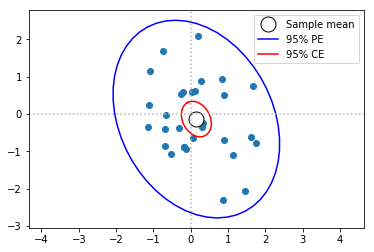

In [3]:
#(0) Create dataset:
np.random.seed(1)        #seed the random number generator to replicate results
alpha       = 0.05       #Type I error rate
mu          = [0,0]      #true population mean
W           = np.eye(2)  #population covariance
J           = 30         #sample size
I           = 2          #number of vector components


#(1) Compute confidence and prediction regions:
y       = mu + np.random.multivariate_normal(mu, W, J) #bivariate Gaussian data
ds      = ci1d.BivariateDataset0D(y)
ci      = ds.get_confidence_region(alpha=alpha)
pi      = ds.get_prediction_region(alpha=alpha)


#(2) Plot:
ax      = pyplot.axes()
ds.plot(ax, plot_sample_mean=True)
pi.plot(ax, color='b')
ci.plot(ax, color='r')
ax.axhline(0, color='0.7', ls=':')
ax.axvline(0, color='0.7', ls=':')
ax.legend()
ax.axis('equal')
pyplot.show()

___

### Univariate 1D data

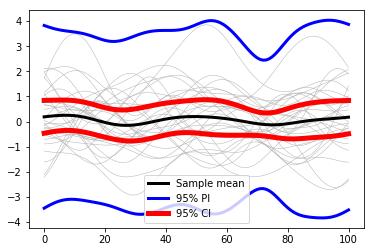

In [4]:
from spm1d import rft1d


#(0) Create dataset:
np.random.seed(32)     #seed the random number generator to replicate results
alpha = 0.05
J     = 30             #sample size
Q     = 101            #number of continuum nodes
fwhm  = 20             #smoothness
y     = rft1d.randn1d(J, Q, fwhm)  #smooth 1D Gaussian data


#(1) Compute confidence and prediction regions:
ds      = ci1d.UnivariateDataset1D(y)
ci      = ds.get_confidence_region(alpha=alpha)
pi      = ds.get_prediction_region(alpha=alpha)


#(2) Plot:
ax      = pyplot.axes()
ds.plot(ax, plot_sample_mean=True)
pi.plot(ax, color='b', lw=3)
ci.plot(ax, color='r', lw=5)
# ax.axhline(0, color='0.7', ls=':')
# ax.axvline(0, color='0.7', ls=':')
ax.legend()
pyplot.show()

___

### Bivariate 1D data

<Figure size 576x216 with 0 Axes>

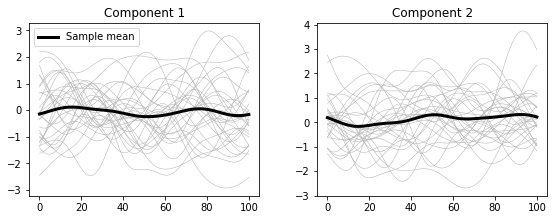

In [5]:
#(0) Create dataset:
np.random.seed(32)     #seed the random number generator to replicate results
alpha = 0.05
J     = 30             #sample size
Q     = 101            #number of continuum nodes
fwhm  = 20             #smoothness
W     = np.eye(2)      #population covariance
y     = rft1d.random.multirandn1d(J, Q, I, fwhm, W)  #smooth bivariate 1D Gaussian data


#(1) Compute confidence and prediction regions:
ds      = ci1d.BivariateDataset1D(y)
ci      = ds.get_confidence_region(alpha)
pi      = ds.get_prediction_region(alpha)


#visualization difficult in a 2D plot;  see CI2
pyplot.figure(figsize=(8,3))
ds.plot()

It is difficult to visualize the confidence and prediction regions for bivariate 1D data (see Mullineaux, 2017), and **ci1d** does not directly support their visualization.

___

### Summary

[**ci1d**](https://github.com/0todd0000/ci1d) provides a high-level interface for constructing and plotting confidence and prediction regions for one-sample designs. Supported data types include:

* Univariate 0D data (confidence and prediction intervals)
* Bivariate  0D data (confidence and prediction ellipses)
* Univariate 1D data (confidence and prediction intervals)
* Bivariate  1D data (confidence and prediction ellipses)

High-level visualization functions are provided for the first three, but not for bivariate 1D data.